## Which Countries have had the most significant progression in happiness and why?

### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] =(10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [2]:
pd.set_option('display.max_rows', None);

In [3]:
# Import data

%store -r happiness_2023

In [4]:
# Create duplicates

data_2023 = happiness_2023

In [5]:
data_2023.head(20)

,country_name,country_id,region,happiness_score,log_gdp_per_capita,social_support,life_expectancy,freedom,generosity,perception_of_corruption,signal
0,Afghanistan,1,Asia & Pacific,1.8590,7.324032,0.341341,54.712410,0.381642,-0.081011,0.847215,Unhappy
1,Albania,2,Europe,5.2773,9.567472,0.717909,69.150070,0.794328,-0.006932,0.878094,Moderate
2,Algeria,3,Arab States,5.3291,9.300214,0.855219,66.549232,0.571240,-0.117374,0.716906,Moderate
3,Argentina,4,South/Latin America,6.0237,9.958788,0.890890,67.200081,0.822678,-0.089480,0.814013,Happy
4,Armenia,5,Europe,5.3417,9.614713,0.790231,67.788971,0.795605,-0.155315,0.705434,Moderate
5,Australia,6,Asia & Pacific,7.0946,10.821049,0.933870,71.049942,0.890200,0.197561,0.495916,Happy
6,Austria,7,Europe,7.0973,10.898906,0.888436,71.150047,0.854737,0.101604,0.496774,Happy
7,Bahrain,8,Arab States,6.1732,10.775782,0.843845,65.824997,0.943973,0.117025,0.736699,Happy
8,Bangladesh,9,Asia & Pacific,4.2821,8.684880,0.544469,64.548424,0.845008,0.005050,0.698185,Unhappy
9,Belgium,10,Europe,6.8591,10.843587,0.914871,70.899086,0.825229,0.001419,0.548573,Happy


### 2023 Analysis

In [6]:
test_data_2023 = data_2023

print(test_data_2023.shape)
test_data_2023.head(20)

(137, 11)


,country_name,country_id,region,happiness_score,log_gdp_per_capita,social_support,life_expectancy,freedom,generosity,perception_of_corruption,signal
0,Afghanistan,1,Asia & Pacific,1.8590,7.324032,0.341341,54.712410,0.381642,-0.081011,0.847215,Unhappy
1,Albania,2,Europe,5.2773,9.567472,0.717909,69.150070,0.794328,-0.006932,0.878094,Moderate
2,Algeria,3,Arab States,5.3291,9.300214,0.855219,66.549232,0.571240,-0.117374,0.716906,Moderate
3,Argentina,4,South/Latin America,6.0237,9.958788,0.890890,67.200081,0.822678,-0.089480,0.814013,Happy
4,Armenia,5,Europe,5.3417,9.614713,0.790231,67.788971,0.795605,-0.155315,0.705434,Moderate
5,Australia,6,Asia & Pacific,7.0946,10.821049,0.933870,71.049942,0.890200,0.197561,0.495916,Happy
6,Austria,7,Europe,7.0973,10.898906,0.888436,71.150047,0.854737,0.101604,0.496774,Happy
7,Bahrain,8,Arab States,6.1732,10.775782,0.843845,65.824997,0.943973,0.117025,0.736699,Happy
8,Bangladesh,9,Asia & Pacific,4.2821,8.684880,0.544469,64.548424,0.845008,0.005050,0.698185,Unhappy
9,Belgium,10,Europe,6.8591,10.843587,0.914871,70.899086,0.825229,0.001419,0.548573,Happy


In [7]:
signal_count = test_data_2023['signal'].value_counts().reset_index().rename(columns = {'index':'signal', 'signal':'count'})
signal_count

,signal,count
0,Happy,55
1,Moderate,54
2,Unhappy,28


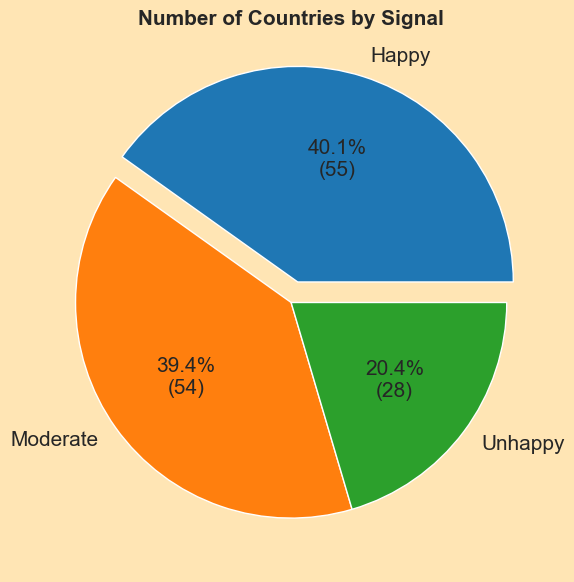

In [8]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format
explode = [0.1, 0, 0] 

plt.pie(signal_count['count'], labels = signal_count['signal'], explode=explode, autopct = autopct_format(signal_count['count']))

plt.rcParams['figure.figsize'] = (10,5)

plt.title('Number of Countries by Signal', fontweight='bold', size=15)
plt.tick_params(labelsize=30)

plt.show() 

[Text(0, 0, '55'), Text(0, 0, '54'), Text(0, 0, '28')]

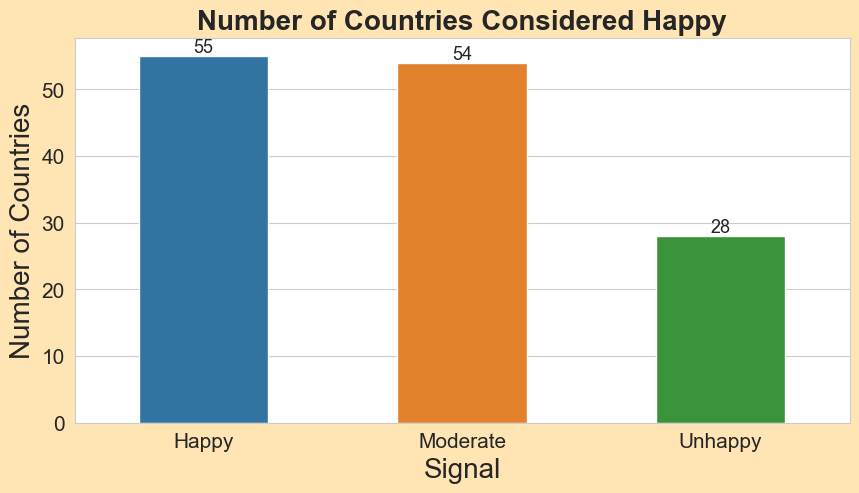

In [9]:
ax = sns.barplot(data=signal_count, x='signal', y='count', width=0.5)
plt.rcParams['figure.figsize'] = (10,5)

ax.set_title('Number of Countries Considered Happy',fontweight="bold", size=20)
ax.set_xlabel('Signal', size=20)
ax.set_ylabel('Number of Countries', size=20)
ax.tick_params(labelsize=15)
ax.bar_label(ax.containers[0], size=13)

In [10]:
# Top 10 happiest and unhappiest countries in 2023

bar_high_country = test_data_2023.sort_values('happiness_score').sort_values('happiness_score', ascending=False).head(10)
bar_low_country = test_data_2023.sort_values('happiness_score').sort_values('happiness_score', ascending=True).head(10)

bar_country = pd.concat([bar_high_country,bar_low_country]).sort_values('happiness_score', ascending=False)

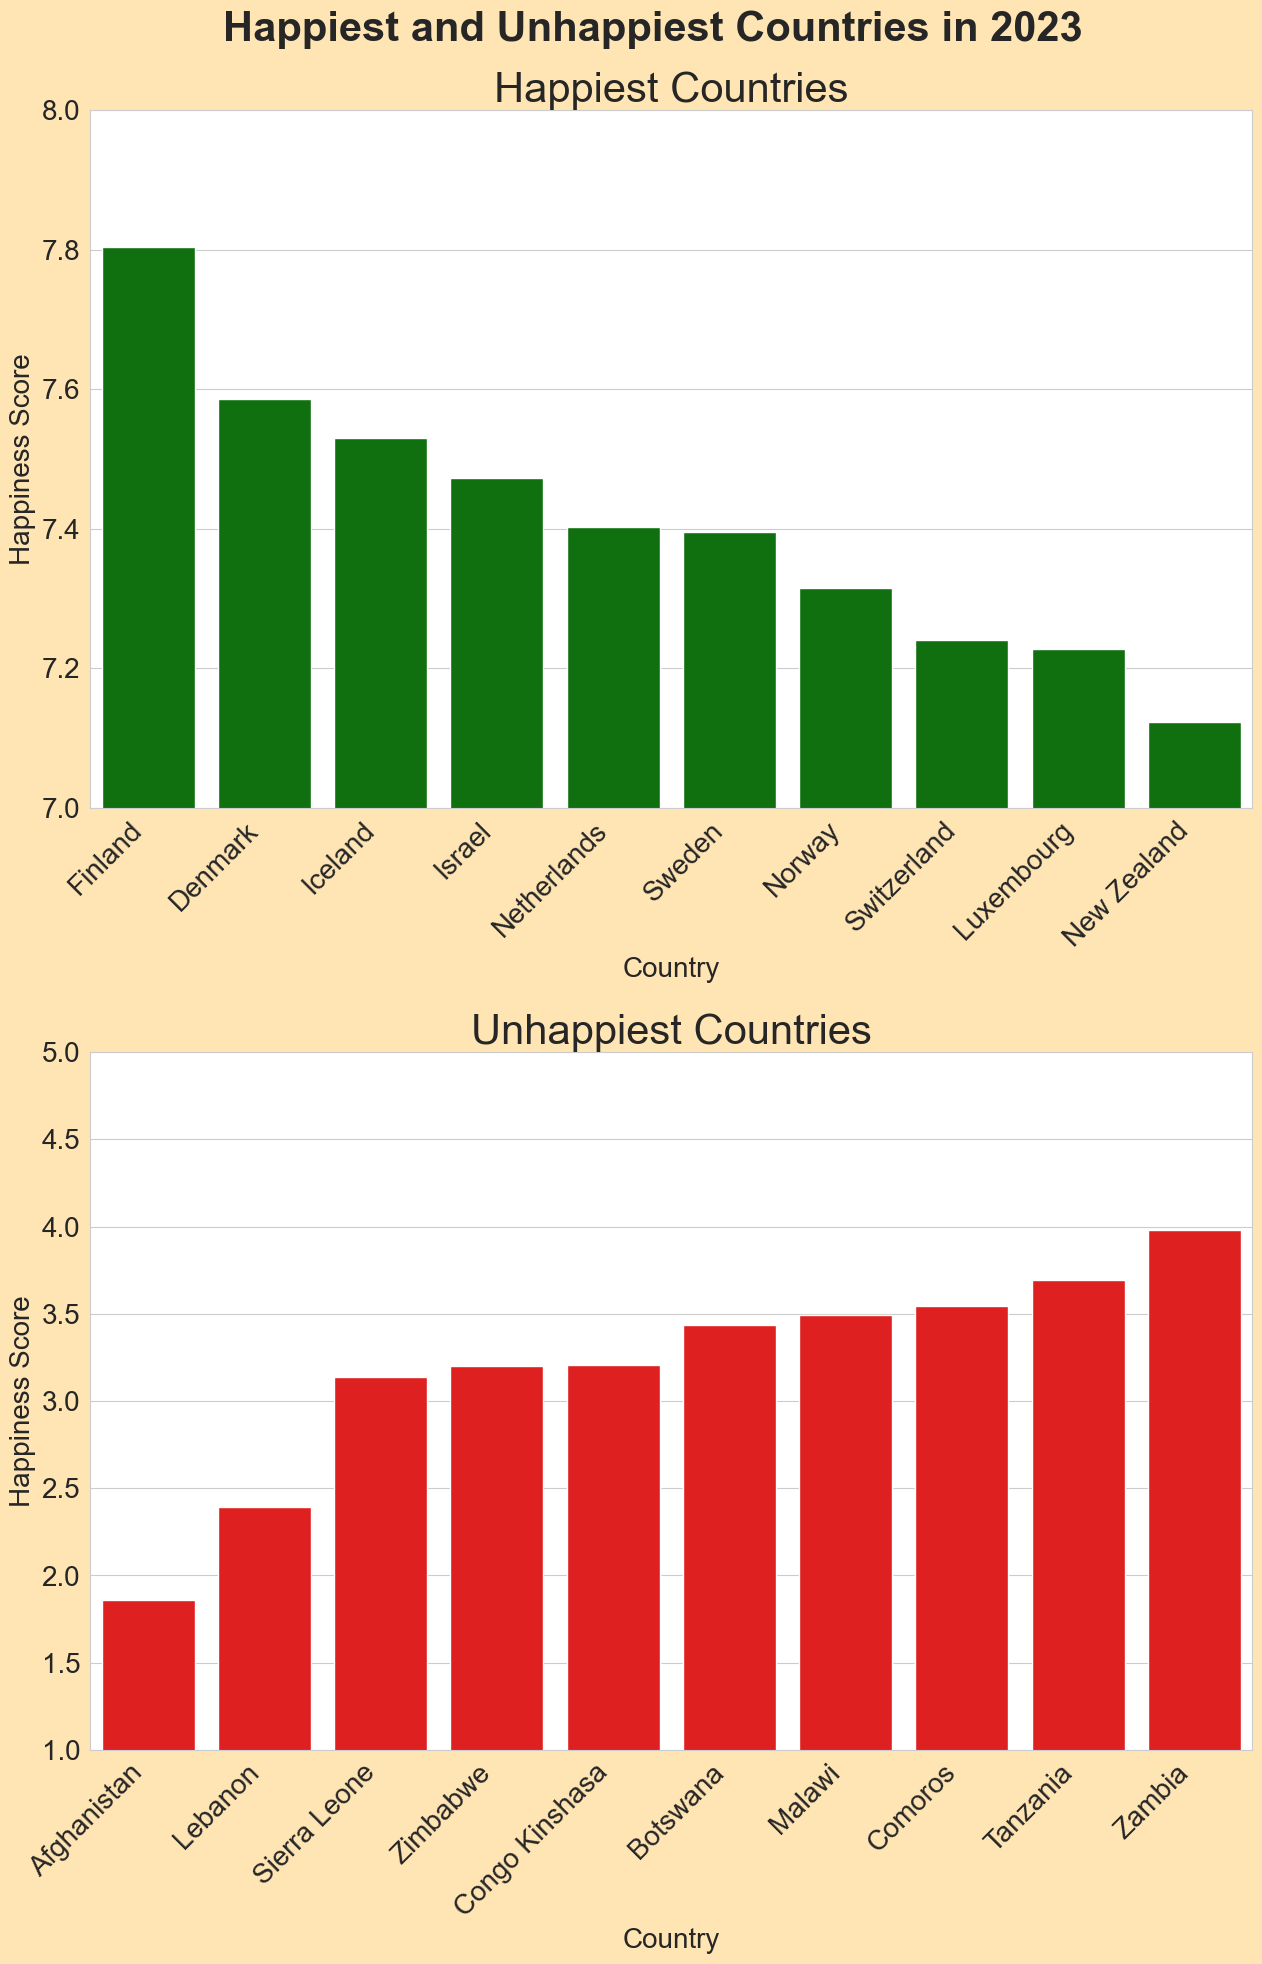

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle('Happiest and Unhappiest Countries in 2023', fontweight="bold", fontsize=30)
fig.subplots_adjust(top=.93, hspace = .35)

sns.barplot(data=bar_high_country, x='country_name', y='happiness_score', color='green', ax=ax[0])
ax[0].set_title('Happiest Countries', size=30)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')
ax[0].set_ylim([7, 8])
ax[0].set_xlabel('Country', fontsize=20)
ax[0].set_ylabel('Happiness Score', fontsize=20)
ax[0].tick_params(labelsize=20)

sns.barplot(data=bar_low_country, x='country_name', y='happiness_score', color='red', ax=ax[1])
ax[1].set_title('Unhappiest Countries', size=30)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')
ax[1].set_ylim([1, 5])
ax[1].set_xlabel('Country', fontsize=20)
ax[1].set_ylabel('Happiness Score', fontsize=20)
ax[1].tick_params(labelsize=20)

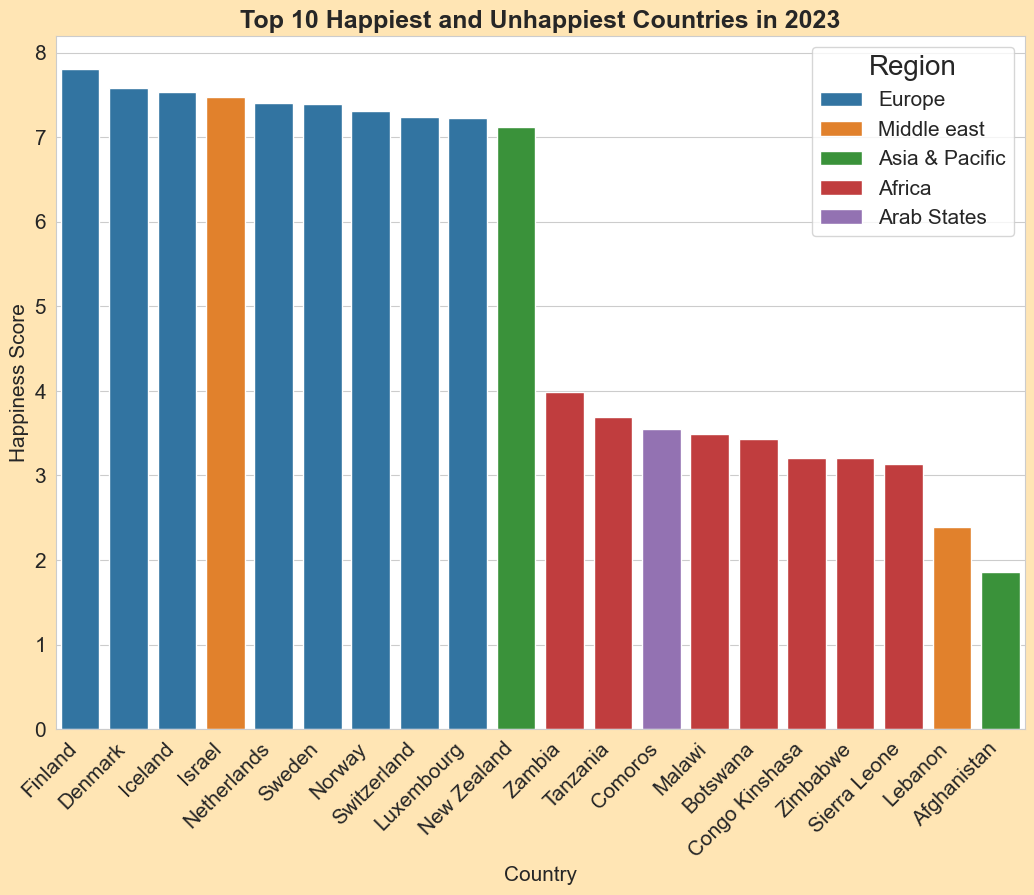

In [55]:
# Top 10 highest and lowest happiness_score

plt.rcParams['figure.figsize'] = (12.5,9)
ax = sns.barplot(data=bar_country, x='country_name', y='happiness_score', hue='region', dodge=False)

ax.set_title('Top 10 Happiest and Unhappiest Countries in 2023',fontweight="bold")
ax.legend(title='Region', title_fontsize='20', loc = 'upper right')
ax.set_xlabel('Country')
ax.set_ylabel('Happiness Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.tick_params(labelsize=15)

plt.show()

In [13]:
test_data_2023.describe()

,country_id,happiness_score,log_gdp_per_capita,social_support,life_expectancy,freedom,generosity,perception_of_corruption
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.000000,5.539755,9.449785,0.799045,65.035599,0.787427,0.022444,0.725375
std,39.692569,1.139908,1.207315,0.129188,5.784190,0.112350,0.141711,0.176960
min,1.000000,1.859000,5.526723,0.341341,51.530212,0.381642,-0.254276,0.146112
25%,35.000000,4.723900,8.590914,0.722042,60.698277,0.723874,-0.073543,0.667848
50%,69.000000,5.684300,9.567472,0.827064,65.850250,0.800536,0.001419,0.773583
75%,103.000000,6.333800,10.540300,0.895955,69.599998,0.874468,0.117025,0.845892
max,137.000000,7.804200,11.659949,0.982533,77.279778,0.961408,0.531386,0.929089


Text(22.694444444444443, 0.5, 'Number of Countries')

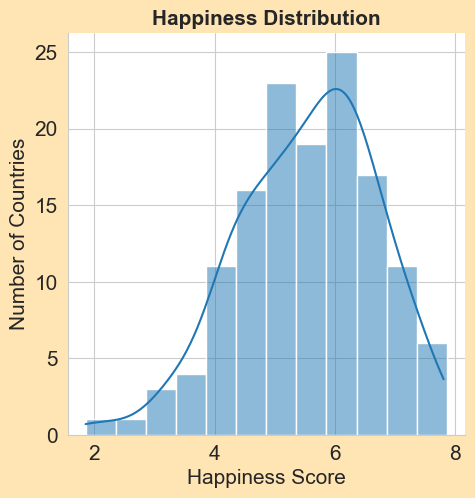

In [14]:
sns.displot(data = test_data_2023, x="happiness_score", binwidth=0.5, kde=True)

plt.title('Happiness Distribution', fontweight='bold', fontsize='15')
plt.xlabel('Happiness Score', fontsize=15)
plt.ylabel('Number of Countries', fontsize=15)

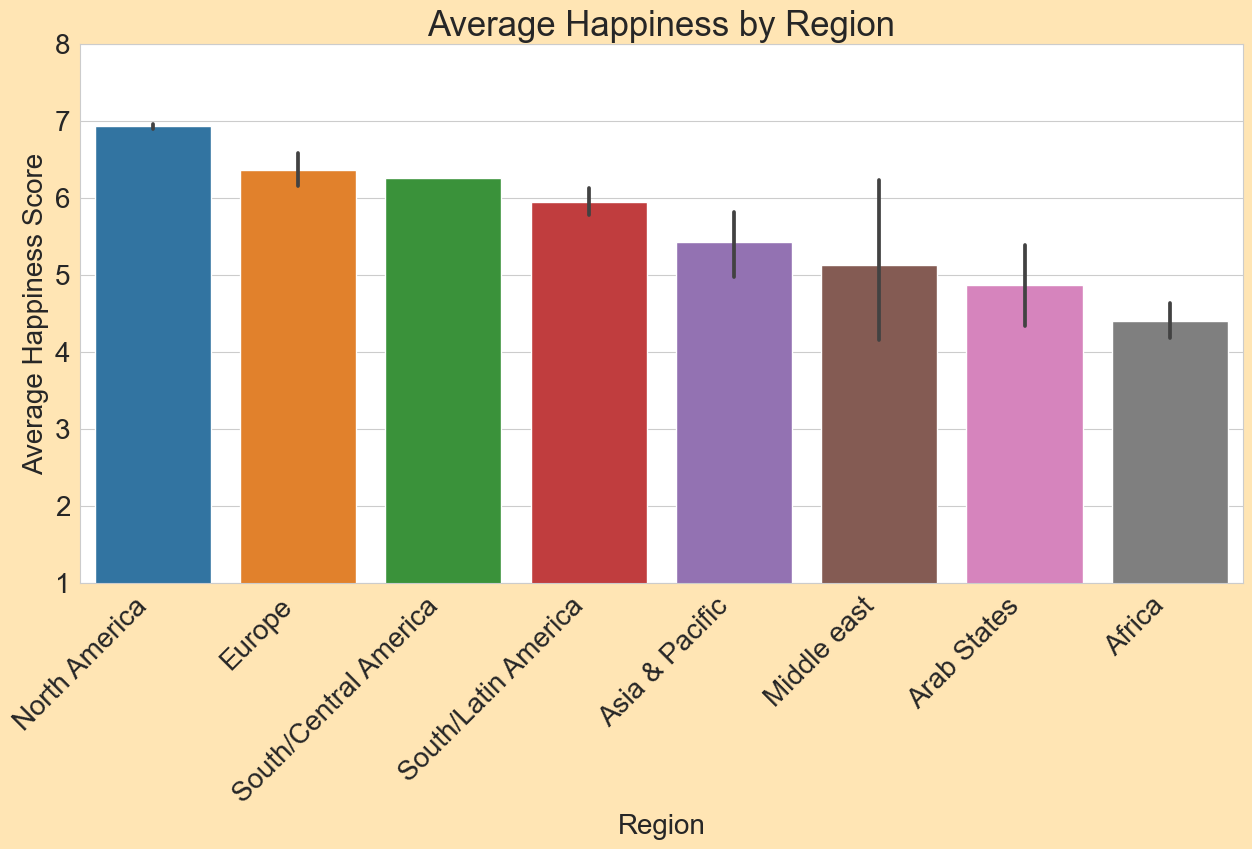

In [15]:
# Regions

order = test_data_2023.groupby('region')['happiness_score'].mean().sort_values(ascending=False).reset_index()['region'].tolist()

plt.rcParams['figure.figsize'] = (15,7)

ax = sns.barplot(data=test_data_2023, x='region', y='happiness_score', order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Average Happiness by Region', fontsize='25')
plt.ylim(1, 8)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Average Happiness Score', fontsize=20)
plt.tick_params(labelsize=20)

plt.show()

Text(57.40744444444444, 0.5, 'Number of Countries')

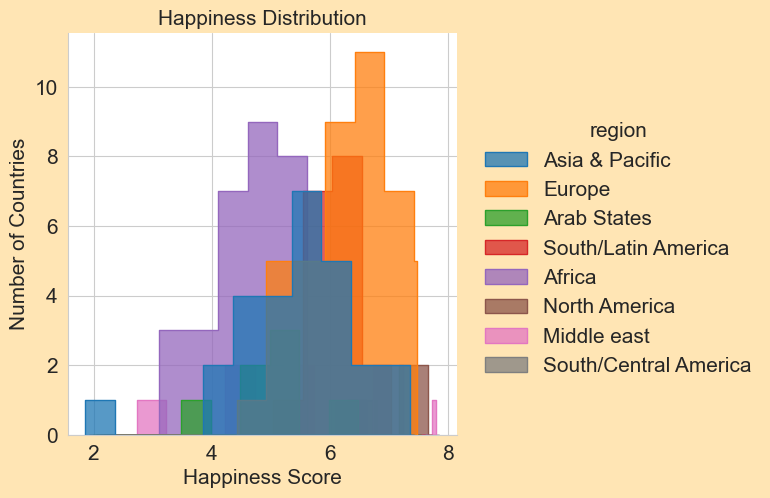

In [16]:
sns.displot(data = test_data_2023, x="happiness_score", binwidth=0.5, hue=test_data_2023['region'], element="step", multiple="dodge")

plt.title('Happiness Distribution', fontsize='15')
plt.xlabel('Happiness Score', fontsize=15)
plt.ylabel('Number of Countries', fontsize=15)

Text(40.03244444444444, 0.5, 'Density')

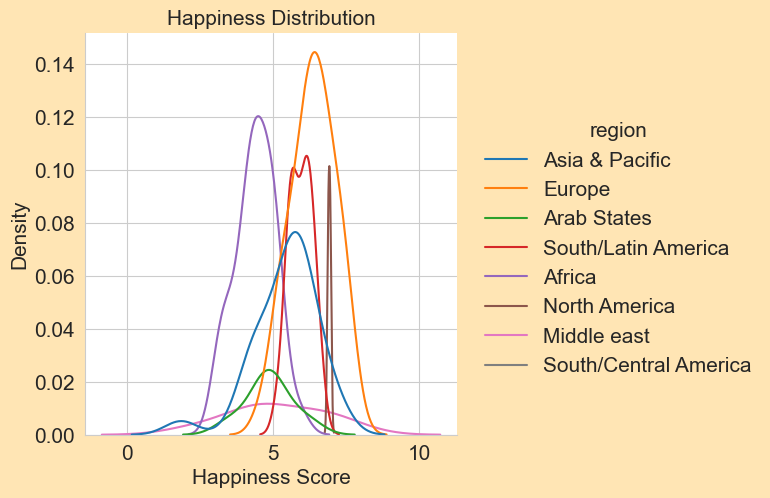

In [17]:
sns.displot(data = test_data_2023, x="happiness_score", kind='kde', hue="region", warn_singular=False)

plt.title('Happiness Distribution', fontsize='15')
plt.xlabel('Happiness Score', fontsize=15)
plt.ylabel('Density', fontsize=15)

In [18]:
regions = test_data_2023['region'].drop_duplicates().reset_index().drop('index', axis=1)
regions

,region
0,Asia & Pacific
1,Europe
2,Arab States
3,South/Latin America
4,Africa
5,North America
6,Middle east
7,South/Central America


In [19]:
test_data_2023.sort_values('region', ascending=True).head(20)

,country_name,country_id,region,happiness_score,log_gdp_per_capita,social_support,life_expectancy,freedom,generosity,perception_of_corruption,signal
136,Zimbabwe,137,Africa,3.2035,7.640998,0.689918,54.049889,0.654055,-0.046230,0.765582,Unhappy
41,Gabon,42,Africa,5.0347,9.537482,0.745509,58.251789,0.641774,-0.187012,0.786315,Moderate
109,Sierra Leone,110,Africa,3.1376,7.394014,0.555251,54.899853,0.660367,0.104929,0.857780,Unhappy
107,Senegal,108,Africa,4.8551,8.155287,0.629286,59.998932,0.771607,0.010773,0.845892,Moderate
25,Congo Brazzaville,26,Africa,5.2671,8.095203,0.604605,56.850044,0.730042,-0.004339,0.739186,Moderate
26,Congo Kinshasa,27,Africa,3.2072,7.006671,0.651610,55.375000,0.663798,0.085998,0.833752,Unhappy
45,Ghana,46,Africa,4.6050,8.595744,0.640672,58.762775,0.776914,0.139254,0.880534,Moderate
75,Malawi,76,Africa,3.4952,7.301523,0.530796,58.475346,0.750036,0.005193,0.748949,Unhappy
94,Nigeria,95,Africa,4.9806,8.495839,0.739812,54.890827,0.718404,0.072849,0.911167,Moderate
31,Côte D'Ivoire,32,Africa,5.0527,8.576385,0.572348,55.952713,0.732655,0.002821,0.745851,Moderate


In [20]:
regions_sorted_count = test_data_2023.groupby('region')['happiness_score'].count().sort_values(ascending=False).reset_index()['region'].tolist()
regions_sorted_count

['Europe',
 'Africa',
 'Asia & Pacific',
 'South/Latin America',
 'Middle east',
 'Arab States',
 'North America',
 'South/Central America']

In [21]:
 test_data_2023.groupby('region')['happiness_score'].count().sort_values(ascending=False)

region
Europe                   43
Africa                   31
Asia & Pacific           27
South/Latin America      18
Middle east               8
Arab States               7
North America             2
South/Central America     1
Name: happiness_score, dtype: int64

In [22]:
test_data_2023.region = pd.Categorical(test_data_2023.region,categories=regions_sorted_count)
test_data_2023.sort_values('region').head(20)

,country_name,country_id,region,happiness_score,log_gdp_per_capita,social_support,life_expectancy,freedom,generosity,perception_of_corruption,signal
68,Latvia,69,Europe,6.2127,10.370321,0.937128,66.400368,0.817607,-0.055582,0.830252,Happy
95,Norway,96,Europe,7.3155,11.087730,0.943477,71.500023,0.946616,0.140636,0.282745,Happy
28,Croatia,29,Europe,6.1250,10.340739,0.917181,68.949982,0.757123,-0.092646,0.925283,Happy
30,Czech Republic,31,Europe,6.8452,10.611020,0.952578,69.049744,0.902515,0.039763,0.858949,Happy
32,Denmark,33,Europe,7.5864,10.962164,0.954112,71.250145,0.933533,0.134242,0.195814,Happy
90,Netherlands,91,Europe,7.4030,10.942279,0.930499,71.550018,0.886875,0.212686,0.378929,Happy
84,Montenegro,85,Europe,5.7222,9.812591,0.889606,67.099998,0.804998,0.063483,0.844438,Moderate
37,Estonia,38,Europe,6.4552,10.541338,0.945626,69.650169,0.928791,0.031764,0.409467,Happy
82,Moldova,83,Europe,5.8192,9.498775,0.856635,65.299065,0.839716,-0.080084,0.900857,Moderate
39,Finland,40,Europe,7.8042,10.792010,0.968770,71.149994,0.961408,-0.018824,0.181745,Happy


Text(40.03244444444444, 0.5, 'Density')

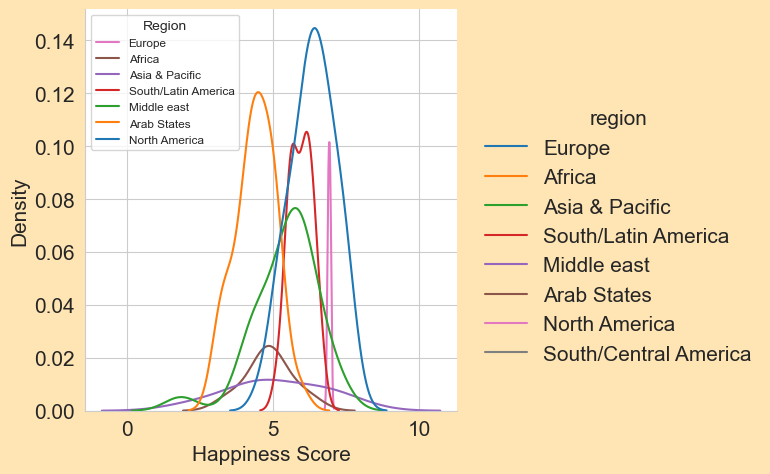

In [23]:
sns.displot(data = test_data_2023.sort_values('region'), x="happiness_score", kind='kde', hue="region", warn_singular=False)

plt.legend(title='Region', title_fontsize=10, loc='upper left', fontsize='8.5', 
                                                            labels=['Europe',
                                                                     'Africa',
                                                                     'Asia & Pacific',
                                                                     'South/Latin America',
                                                                     'Middle east',
                                                                     'Arab States',
                                                                     'North America',
                                                                     'South/Central America'])
plt.xlabel('Happiness Score', fontsize=15)
plt.ylabel('Density', fontsize=15)

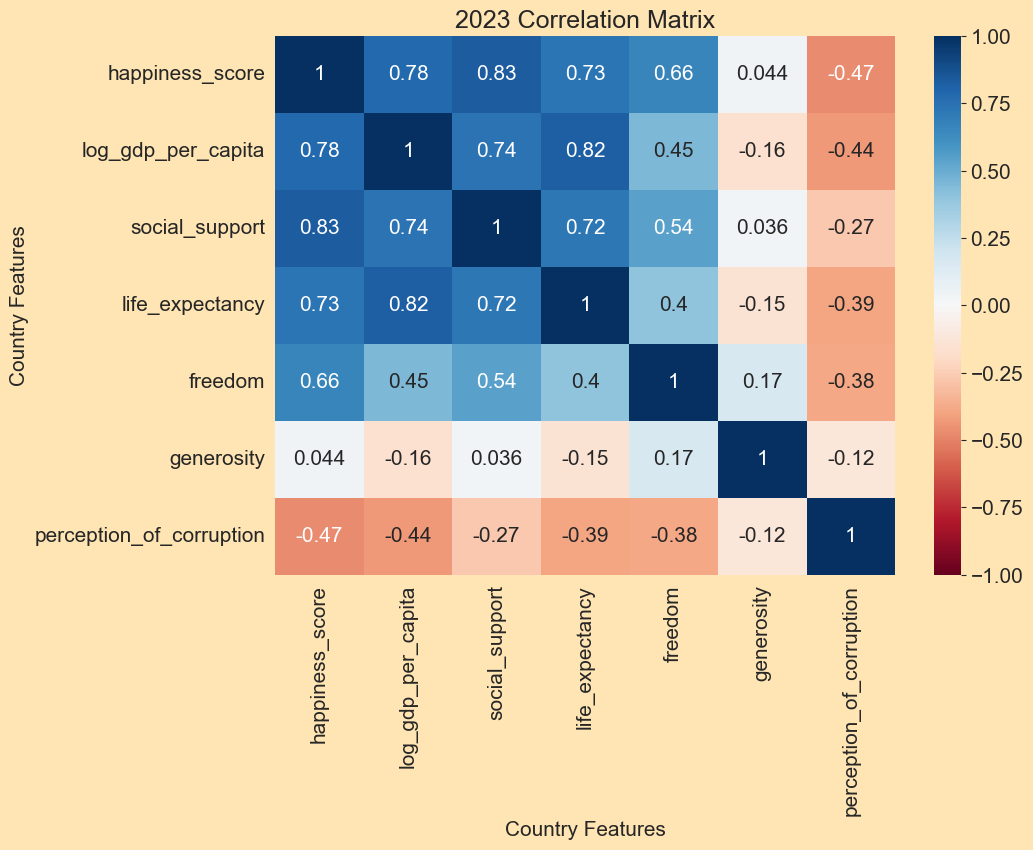

In [37]:
### What country feature correlates with happiness?

plt.rcParams['figure.figsize'] = (10,7)

corr = test_data_2023.drop('country_id', axis=1).corr(numeric_only = True, method = "pearson")
sns.heatmap(corr, annot=True, cmap="RdBu", vmin=-1, vmax=1)

plt.title('2023 Correlation Matrix')
plt.xlabel('Country Features')
plt.ylabel('Country Features')

plt.show()

# Shows that Country Features with the highest correlation to happiness are: log_gdp_per_capita, healthy_life_expectancy, and social_support

In [25]:
# Show what correlates to happiness

happiness_correlation_matrix = test_data_2023.corr(numeric_only = True)['happiness_score'].sort_values(ascending=False)
happiness_correlation_matrix.reset_index().rename(columns = {'index':'country_feature', 'happiness_score':'correlation'})

,country_feature,correlation
0,happiness_score,1.000000
1,social_support,0.834623
2,log_gdp_per_capita,0.784368
3,life_expectancy,0.732440
4,freedom,0.662922
5,generosity,0.043687
6,country_id,0.036572
7,perception_of_corruption,-0.471976


In [26]:
correlation_matrix = test_data_2023.corr(numeric_only = True)
corr_unstack = correlation_matrix.unstack().sort_values()
test_data_2023_high_corr = corr_unstack.sort_values(ascending=False).reset_index().rename(columns = {'level_0':'country_feature', 'level_1':'country_feature_2', 0:'correlation'}).sort_values('country_feature')
test_data_2023_high_corr = test_data_2023_high_corr[(test_data_2023_high_corr['correlation'] < 1) & (test_data_2023_high_corr['correlation'] > 0.5)].drop_duplicates('correlation', keep='first')
test_data_2023_high_corr.sort_values('correlation', ascending=False).reset_index().drop('index', axis=1)

,country_feature,country_feature_2,correlation
0,happiness_score,social_support,0.834623
1,life_expectancy,log_gdp_per_capita,0.821225
2,happiness_score,log_gdp_per_capita,0.784368
3,log_gdp_per_capita,social_support,0.738087
4,happiness_score,life_expectancy,0.732440
5,life_expectancy,social_support,0.723622
6,freedom,happiness_score,0.662922
7,freedom,social_support,0.541808


In [27]:
## Plot Data
# Order legend

legend = test_data_2023.groupby('region')['happiness_score'].count().reset_index().sort_values('happiness_score', ascending = False)['region'].tolist()
legend

['Europe',
 'Africa',
 'Asia & Pacific',
 'South/Latin America',
 'Middle east',
 'Arab States',
 'North America',
 'South/Central America']

Text(0, 0.5, 'Social Support')

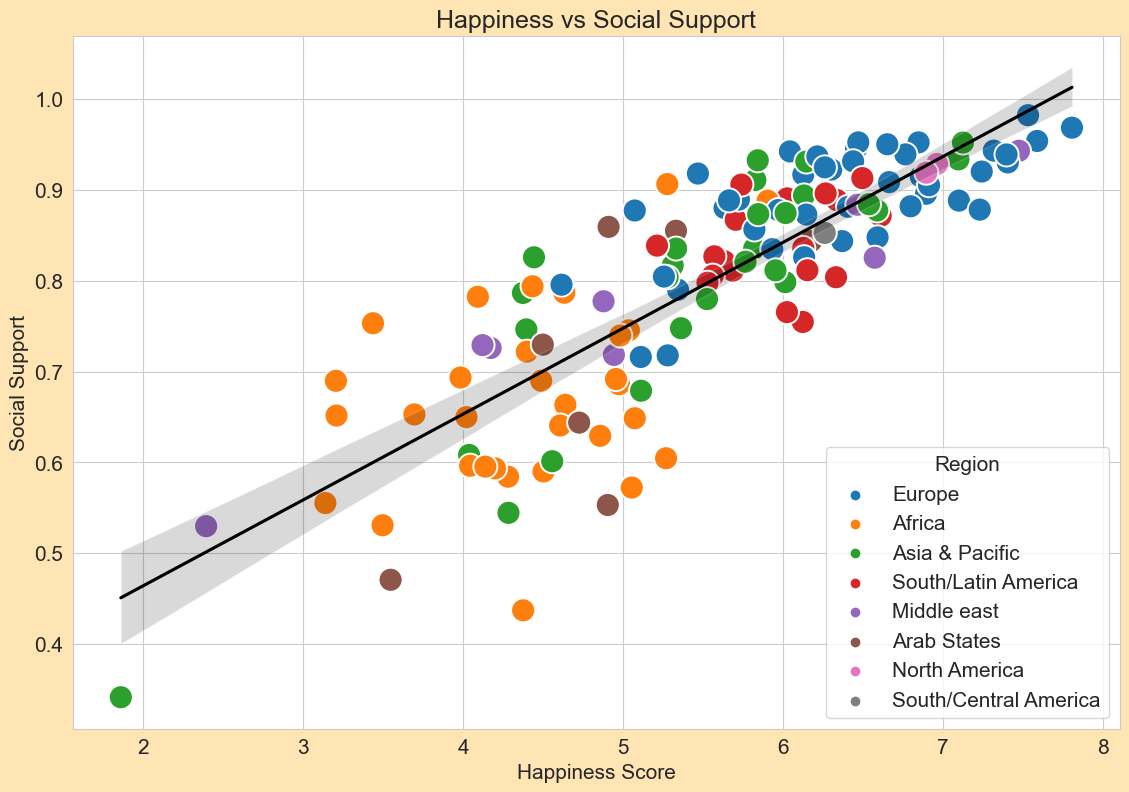

In [28]:
# Plot happiness_score and social_support

plt.rcParams['figure.figsize'] = (13.5,9)

ax = happ_gdp_corr = sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.social_support,
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300)
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="social_support",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)
plt.title('Happiness vs Social Support')
plt.legend(title='Region',loc = 'lower right', fontsize = '15')
plt.xlabel('Happiness Score')
plt.ylabel('Social Support')


Text(0, 0.5, 'Log GDP per Capita')

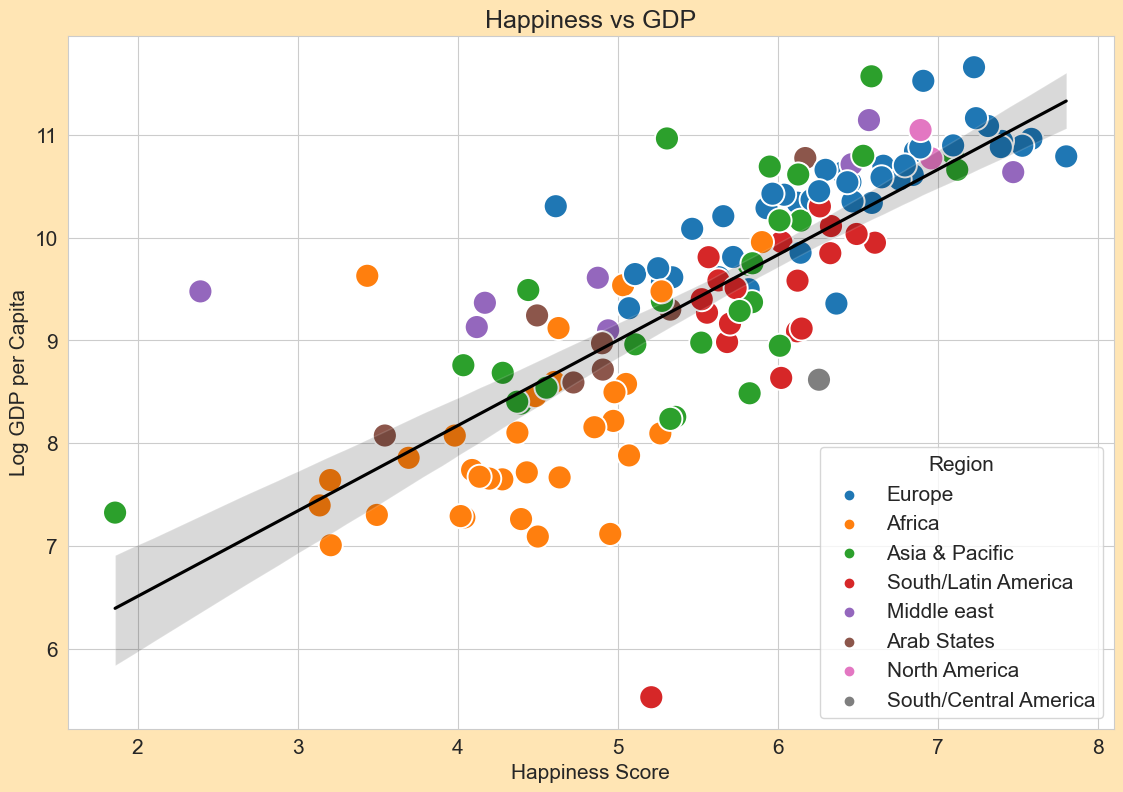

In [29]:
# Plot happiness_score and log_gdp_per_capita

plt.rcParams['figure.figsize'] = (13.5,9)

ax = happ_gdp_corr = sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.log_gdp_per_capita, 
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300)
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="log_gdp_per_capita",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)
plt.title('Happiness vs GDP')
plt.legend(title='Region',loc = 'lower right', fontsize = '15')
plt.xlabel('Happiness Score')
plt.ylabel('Log GDP per Capita')

Text(0, 0.5, 'Life Expectancy')

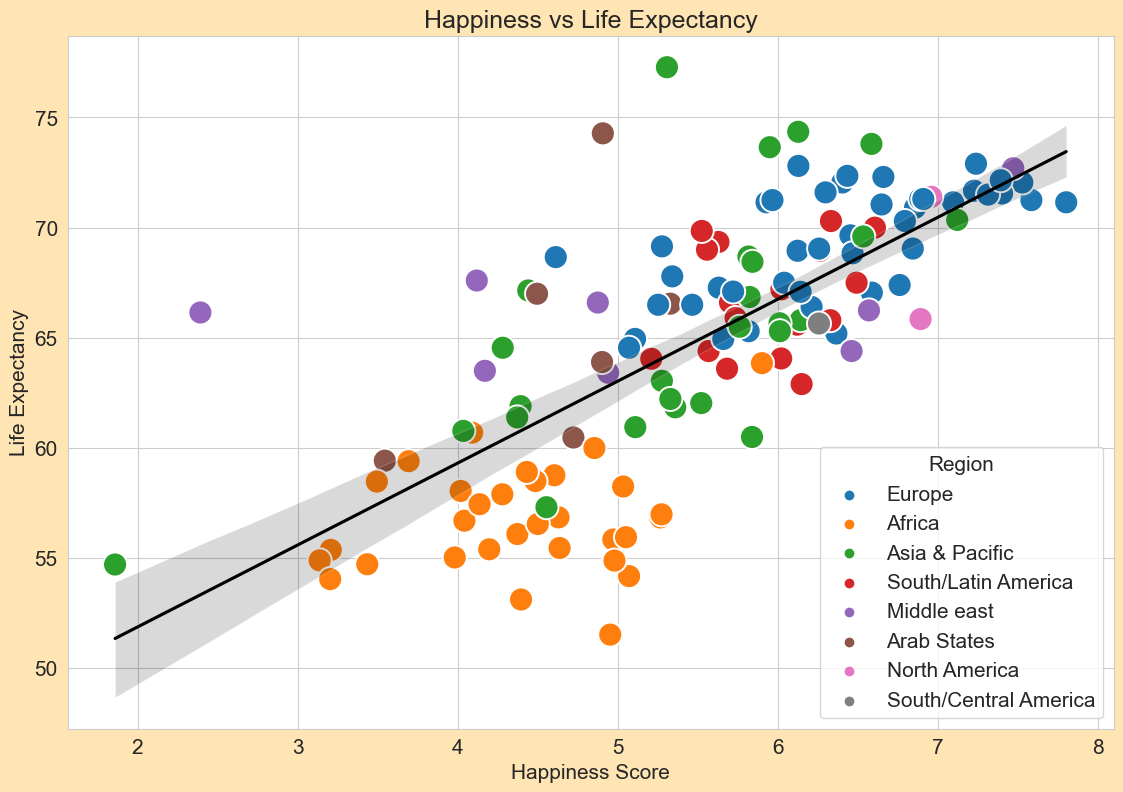

In [30]:
# Plot happiness_score and life_expectancy

plt.rcParams['figure.figsize'] = (13.5,9)

plt.title('Happiness vs Life Expectancy')
ax = happ_gdp_corr = sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.life_expectancy,
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300)
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="life_expectancy",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)

plt.title('Happiness vs Life Expectancy')
plt.legend(title='Region',loc = 'lower right', fontsize = '15')
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Freedom')

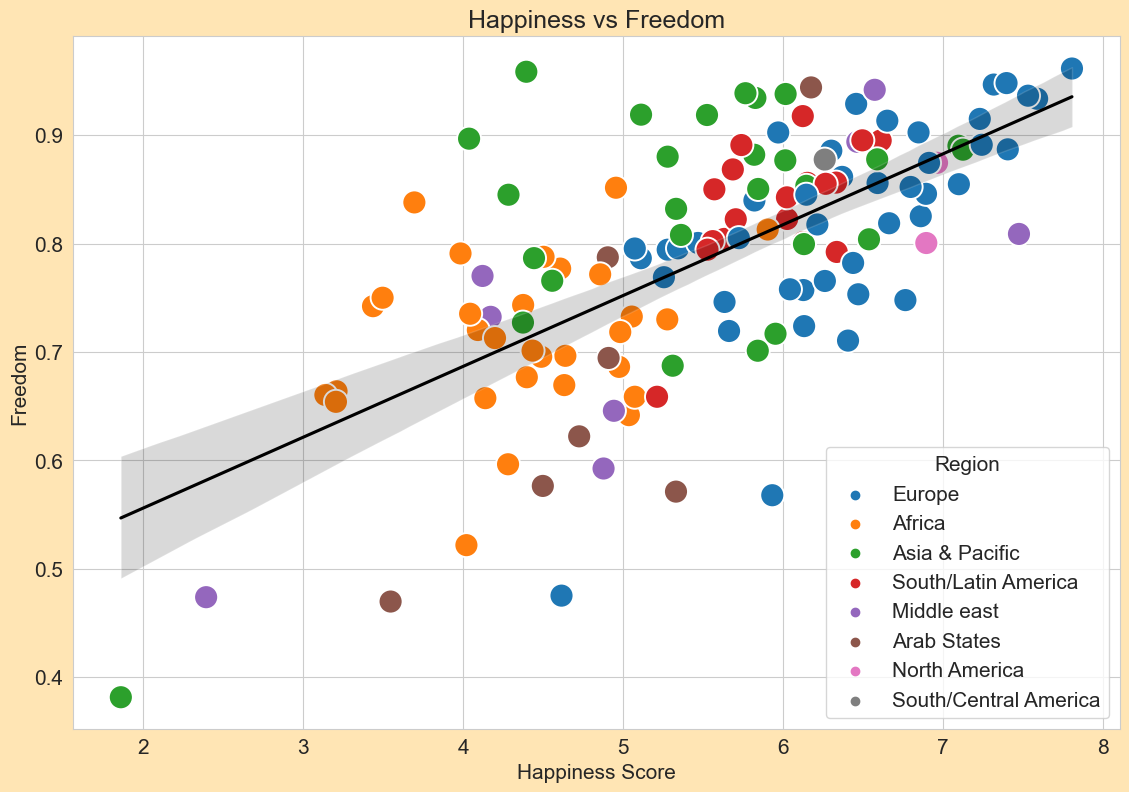

In [31]:
# Plot happiness_score and freedom

plt.rcParams['figure.figsize'] = (13.5,9)
ax = happ_gdp_corr = sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.freedom, 
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300)
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="freedom",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)
plt.title('Happiness vs Freedom')
plt.legend(title='Region',loc = 'lower right', fontsize = '15')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')

Text(0, 0.5, 'Generosity')

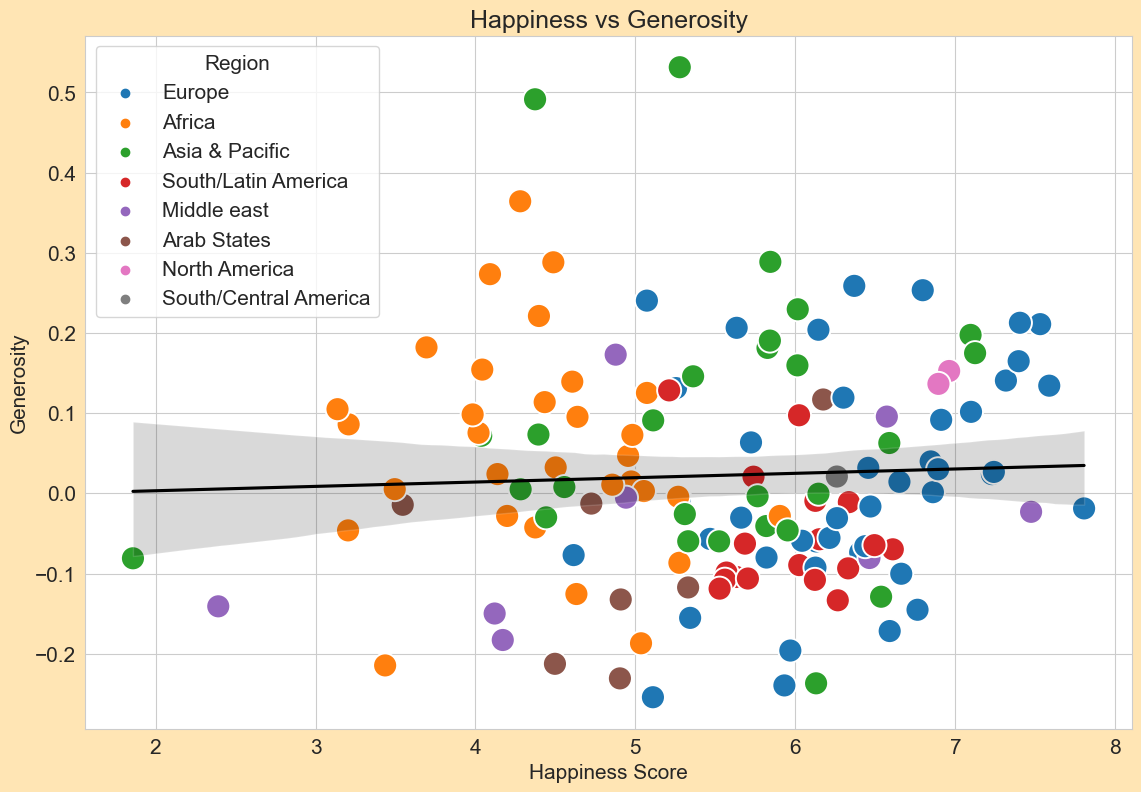

In [32]:
# Plot happiness_score and generosity

plt.rcParams['figure.figsize'] = (13.5,9)

ax = happ_gdp_corr = sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.generosity,
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300)
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="generosity",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)
plt.title('Happiness vs Generosity')
plt.legend(title='Region',loc = 'upper left', fontsize = '15')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')

Text(0, 0.5, 'Perception Of Corruption')

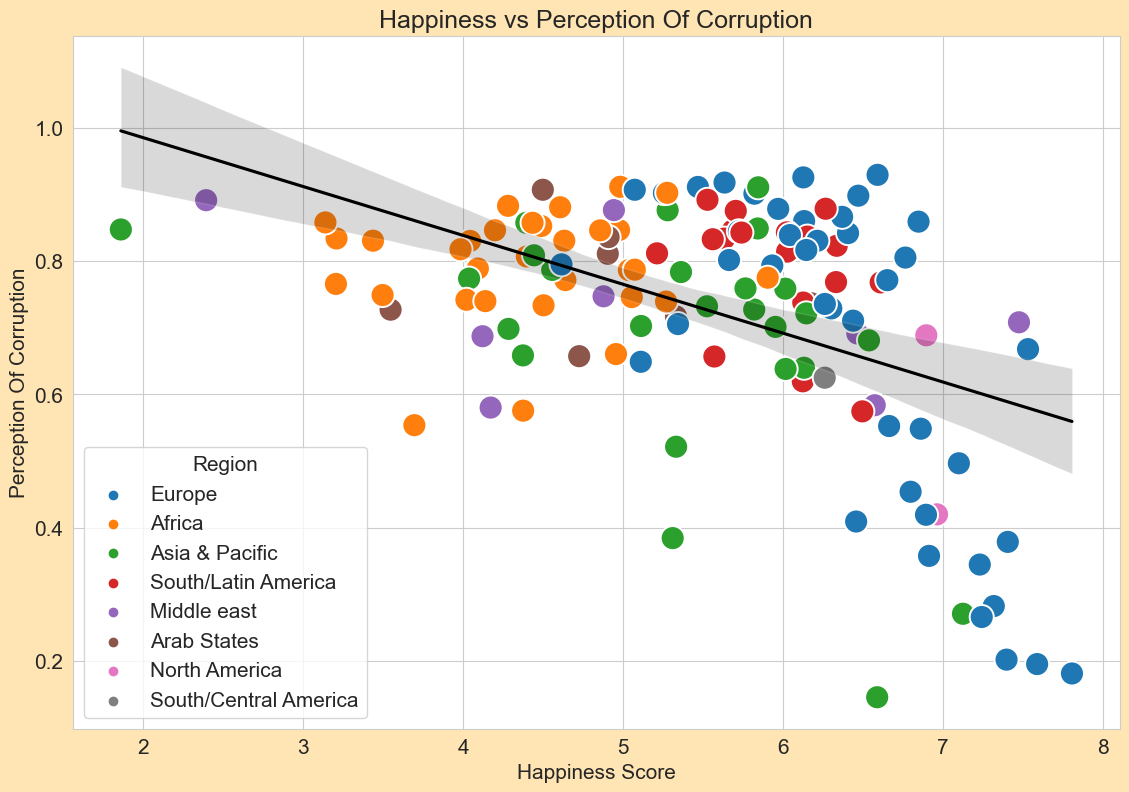

In [33]:
# Plot happiness_score and perception_of_corruption

plt.rcParams['figure.figsize'] = (13.5,9)

ax = happ_gdp_corr = sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.perception_of_corruption,
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300)
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="perception_of_corruption",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax)
plt.title('Happiness vs Perception Of Corruption')
plt.legend(title='Region',loc = 'lower left', fontsize = '15')
plt.xlabel('Happiness Score')
plt.ylabel('Perception Of Corruption')

Text(0, 0.5, 'Perception Of Corruption')

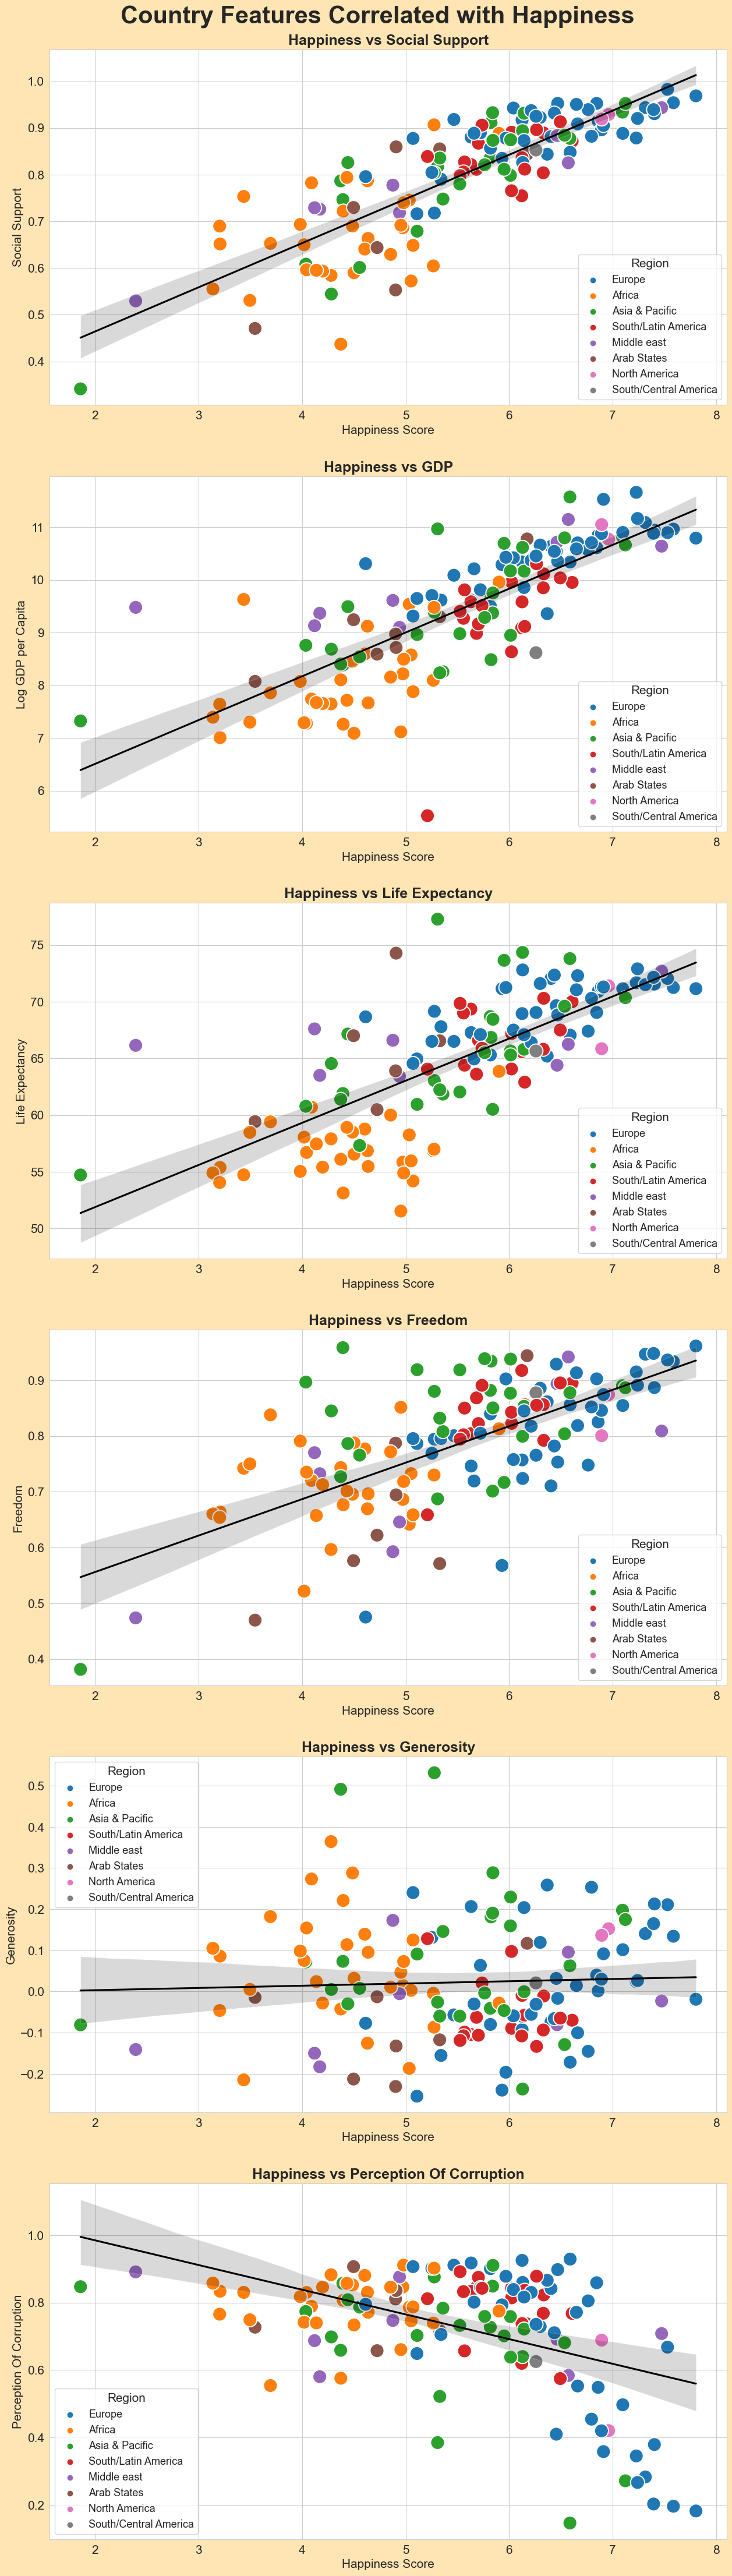

In [34]:
fig, ax = plt.subplots(6, 1, figsize=(15, 50))
fig.suptitle('Country Features Correlated with Happiness', fontweight="bold", fontsize=30)
fig.subplots_adjust(top=.965, hspace = .20)

# Plot happiness_score and social_support

sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.social_support,
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300, ax=ax[0])
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="social_support",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax[0])
ax[0].set_title('Happiness vs Social Support', fontweight="bold")
ax[0].legend(title='Region',loc = 'lower right', fontsize = '13')
ax[0].set_xlabel('Happiness Score')
ax[0].set_ylabel('Social Support')

# Plot happiness_score and log_gdp_per_capita

sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.log_gdp_per_capita, 
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300, ax=ax[1])
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="log_gdp_per_capita",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax[1])
ax[1].set_title('Happiness vs GDP', fontweight="bold")
ax[1].legend(title='Region',loc = 'lower right', fontsize = '13')
ax[1].set_xlabel('Happiness Score')
ax[1].set_ylabel('Log GDP per Capita')

# Plot happiness_score and life_expectancy

sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.life_expectancy,
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300, ax=ax[2])
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="life_expectancy",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax[2])
ax[2].set_title('Happiness vs Life Expectancy', fontweight="bold")
ax[2].legend(title='Region',loc = 'lower right', fontsize = '13')
ax[2].set_xlabel('Happiness Score')
ax[2].set_ylabel('Life Expectancy')

# Plot happiness_score and freedom

sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.freedom, 
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300, ax=ax[3])
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="freedom",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax[3])
ax[3].set_title('Happiness vs Freedom', fontweight="bold")
ax[3].legend(title='Region',loc = 'lower right', fontsize = '13')
ax[3].set_xlabel('Happiness Score')
ax[3].set_ylabel('Freedom')

# Plot happiness_score and generosity

sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.generosity,
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300, ax=ax[4])
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="generosity",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax[4])
ax[4].set_title('Happiness vs Generosity', fontweight="bold")
ax[4].legend(title='Region',loc = 'upper left', fontsize = '13')
ax[4].set_xlabel('Happiness Score')
ax[4].set_ylabel('Generosity')

# Plot happiness_score and perception_of_corruption

sns.scatterplot(x = test_data_2023.happiness_score,
                                     y = test_data_2023.perception_of_corruption,
                                     hue_order = legend, 
                                     hue = test_data_2023['region'], 
                                     s = 300, ax=ax[5])
sns.regplot(data=test_data_2023, 
            x="happiness_score",
            y="perception_of_corruption",
            scatter=False, 
            line_kws={"color": "black"}, 
            ax=ax[5])
ax[5].set_title('Happiness vs Perception Of Corruption', fontweight="bold")
ax[5].legend(title='Region',loc = 'lower left', fontsize = '13')
ax[5].set_xlabel('Happiness Score')
ax[5].set_ylabel('Perception Of Corruption')

In [35]:
# Save Tables

happiness_2023_2 = data_2023

%store happiness_2023_2

Stored 'happiness_2023_2' (DataFrame)
